In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install -q kaggle
from google.colab  import files
files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (2).csv


{'Titanic-Dataset (2).csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,2

In [ ]:
!mkdir -p -/. kaggle
!cp kaggle.json-/kaggle/
!chmod 600 -/.kaggle/kaggle.json
!kaggle datasets download yasserh/titanic-dataset
!unzip titanic-dataset.zip

mkdir: invalid option -- '/'
Try 'mkdir --help' for more information.
cp: missing destination file operand after 'kaggle.json-/kaggle/'
Try 'cp --help' for more information.
chmod: invalid option -- '/'
Try 'chmod --help' for more information.
Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
titanic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  titanic-dataset.zip
replace Titanic-Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
file_path='/content/Titanic-Dataset.csv'
import pandas as pd
data=pd.read_csv(file_path)
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
print(data.head())
print(data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [ ]:
data=data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
print(data.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [ ]:
data['Sex'] = data['Sex'].apply({lambda x:0 if x == 'male' else 1})
data['Embarked']=data['Embarked'].apply({lambda x:0 if x == 'C'else(1 if x=='Q' else 2)})

In [ ]:
x=data.loc[:, data.columns !='Survived']
y=data['Survived']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Now, you can fit the model:
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
print("Precison:",accuracy_score(y_test,y_predict))
print("Classification Report:\n",classification_report(y_test,y_predict))

Precison: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



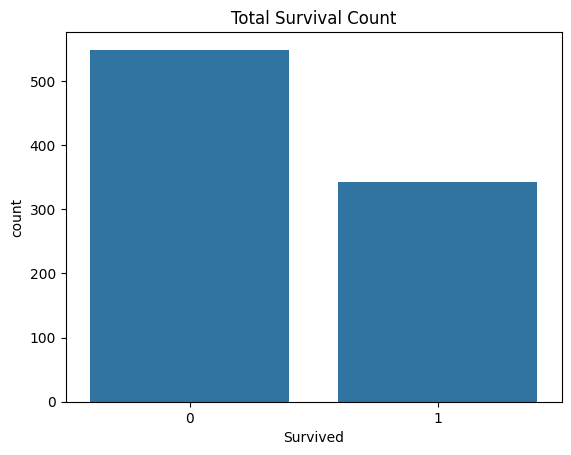

In [ ]:
sns.countplot(x= 'Survived' ,data = data)
plt.title('Total Survival Count')
plt.show()

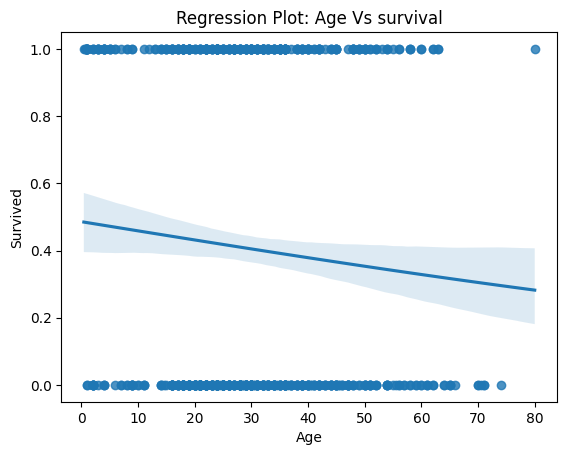

In [ ]:
sns.regplot(x='Age',y='Survived',data=data,logistic=True)
plt.title('Regression Plot: Age Vs survival')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

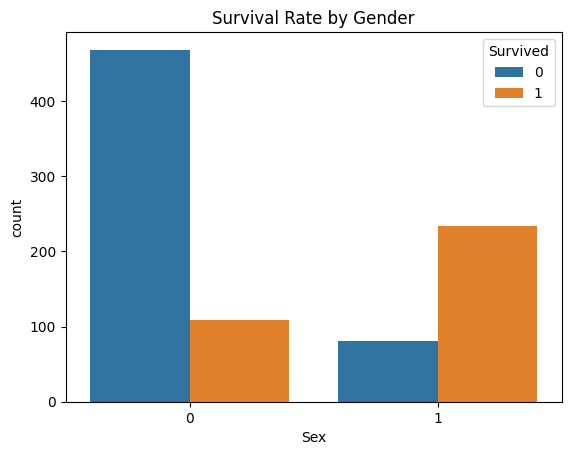

In [ ]:
sns.countplot(x='Sex' , hue='Survived' , data=data)
plt.title('Survival Rate by Gender')
plt.show

In [ ]:
survival_rate_by_gender=data.groupby('Sex')['Survived'].mean()
print(survival_rate_by_gender)

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64


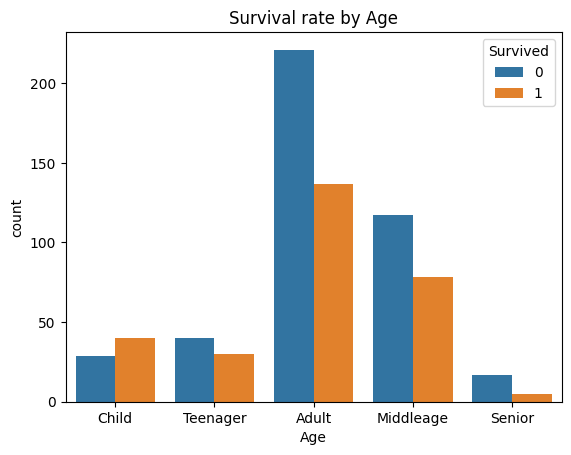

In [ ]:
data['Age']=pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 100 ], labels = ['Child','Teenager','Adult','Middleage','Senior'])
sns.countplot(x='Age', hue='Survived',data = data)
plt.title('Survival rate by Age')
plt.show()

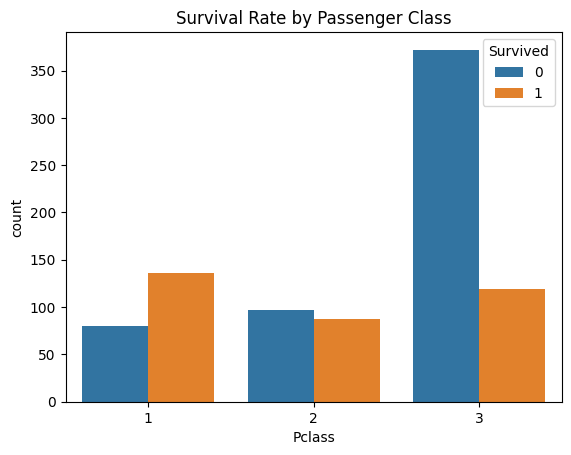

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data = data)
plt.title('Survival Rate by Passenger Class')
plt.show()

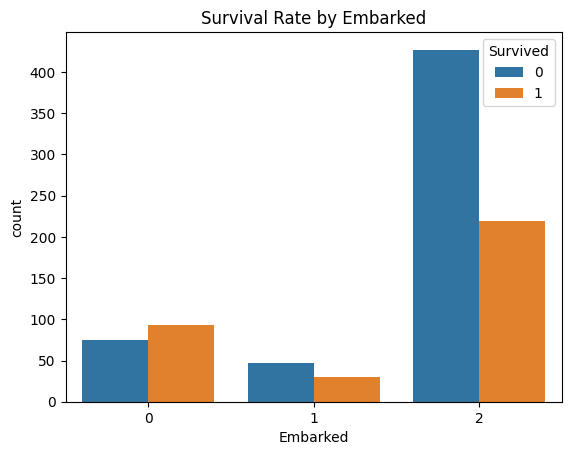

In [ ]:
sns.countplot(x= 'Embarked', hue= 'Survived', data=data)
plt.title('Survival Rate by Embarked')
plt.show()

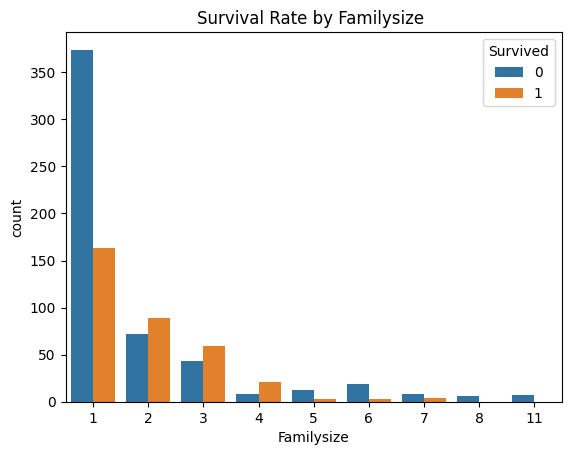

In [ ]:
data['Familysize']= data['SibSp']+ data['Parch']+ 1
sns.countplot(x='Familysize', hue='Survived', data=data)
plt.title('Survival Rate by Familysize ')
plt.show()

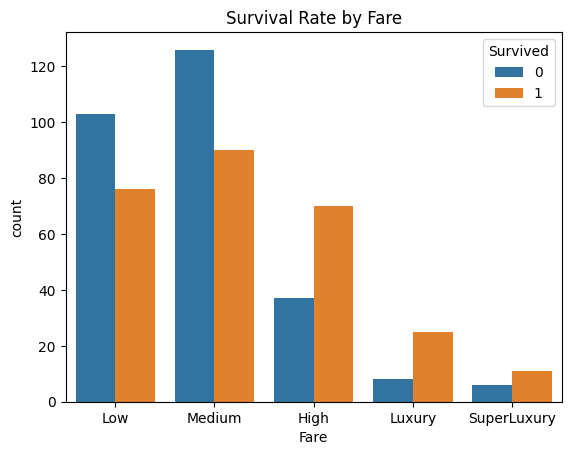

In [ ]:
data['Fare']=pd.cut(data['Fare'], bins=[10,20,50,100,200,500], labels= ['Low','Medium','High','Luxury','SuperLuxury'])
sns.countplot(x='Fare', hue='Survived', data=data)
plt.title('Survival Rate by Fare')
plt.show()

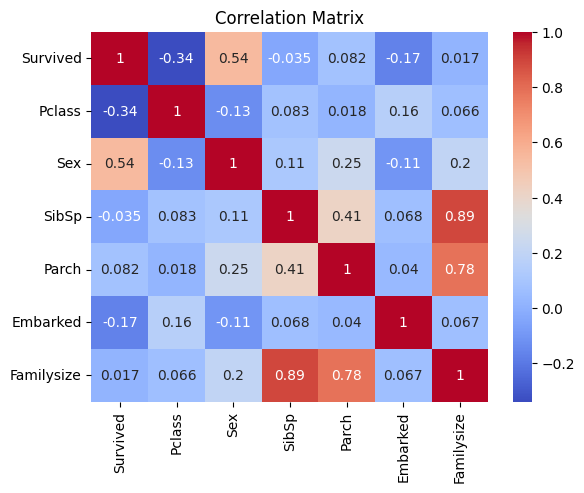

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##Summary of Titanic Survival Analysis
*   Women had significantly higher survival rate than men.
*   Childrens had significantly higher chances of survival than the older ones.
*   Passengers in first Class had a higher survival rate compared to those in lower class.  
*  Embarked ports also affected the survival rates, with passengers from certain ports suriviving at higher rates.
*  Family size also played role in survival rate,with moderate family size having higher survival rate.
*  Passengers who paid higher fares had a better survival rate.









